<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center><img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

Code based on https://github.com/pytorch/examples/blob/master/mnist/main.py

In this exercise we are using high level abstractions from torch.nn like nn.Linear.
Note: during the next lab session we will go one level deeper and implement more things
with bare hands.

Tasks:

    1. Read the code.

    2. Check that the given implementation reaches 95% test accuracy for architecture input-128-128-10 after few epochs.

    3. Add the option to use SGD with momentum instead of ADAM.

    4. Experiment with different learning rates, plot the learning curves for different
    learning rates for both ADAM and SGD with momentum.

    5. Parameterize the constructor by a list of sizes of hidden layers of the MLP.
    Note that this requires creating a list of layers as an atribute of the Net class,
    and one can't use a standard python list containing nn.Modules (why?).
    Check torch.nn.ModuleList.


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # After flattening an image of size 28x28 we have 784 inputs
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    return test_loss



In [44]:
batch_size = 256
test_batch_size = 1000
epochs = 5
lr = [1e-1, 1e-2, 1e-3]
momentum = 0.9
seed = 1
log_interval = 10
use_cuda = torch.cuda.is_available()

In [45]:
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

In [46]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

In [47]:
def choose_optimizer(algorithm, model, lr=lr[0], momentum=momentum):
  if algorithm.lower() == 'adam':
    return optim.Adam(model.parameters(), lr)

  if algorithm.lower() == 'sgd':
    return optim.SGD(model.parameters(), lr, momentum)


In [51]:
adam_losses = {}

for learning_rate in lr:
  model = Net().to(device)
  optimizer = choose_optimizer('adam', model, learning_rate)

  adam_losses[learning_rate] = []

  for epoch in range(1, epochs + 1):
      train(model, device, train_loader, optimizer, epoch, log_interval)
      test_loss = test(model, device, test_loader)

      adam_losses[learning_rate].append(test_loss)

      print("FINAL LOSS AND ACCURACY FOR LR=", learning_rate)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311745
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.858800
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.209704
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.228965
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.160918
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.200737
Train Epoch: 1 [15360/60000 (26%)]	Loss: 2.173932
Train Epoch: 1 [17920/60000 (30%)]	Loss: 2.175817
Train Epoch: 1 [20480/60000 (34%)]	Loss: 2.463768
Train Epoch: 1 [23040/60000 (38%)]	Loss: 2.176734
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.080874
Train Epoch: 1 [28160/60000 (47%)]	Loss: 2.133870
Train Epoch: 1 [30720/60000 (51%)]	Loss: 2.121579
Train Epoch: 1 [33280/60000 (55%)]	Loss: 2.163430
Train Epoch: 1 [35840/60000 (60%)]	Loss: 2.350441
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.427130
Train Epoch: 1 [40960/60000 (68%)]	Loss: 2.295680
Train Epoch: 1 [43520/60000 (72%)]	Loss: 2.303757
Train Epoch: 1 [46080/60000 (77%)]	Loss: 2.295419
Train Epoch: 1 [48640/60000 (81%)]	Loss: 2.288707
Train Epoc

In [49]:
sgd_losses = {}

for learning_rate in lr:
  model = Net().to(device)
  optimizer = choose_optimizer('sgd', model, learning_rate)

  sgd_losses[learning_rate] = []

  for epoch in range(1, epochs + 1):
      train(model, device, train_loader, optimizer, epoch, log_interval)
      test_loss = test(model, device, test_loader)

      sgd_losses[learning_rate].append(test_loss)

      print("FINAL LOSS AND ACCURACY FOR LR=", learning_rate)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296362
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.878830
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.247513
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.520361
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.394152
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.453344
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.334809
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.250803
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.334499
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.287261
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.253939
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.286674
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.286157
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.274144
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.296554
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.204179
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.186162
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.140018
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.304770
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.121003
Train Epoc

{0.1: [0.1845768455505371, 0.12799869804382324, 0.12661855583190917, 0.1290627944946289, 0.11568844947814941], 0.01: [0.2622638671875, 0.1837165298461914, 0.14284807472229005, 0.1199826343536377, 0.10551921119689942], 0.001: [1.042563507080078, 0.48401294860839844, 0.38044447631835937, 0.33651177825927736, 0.3099591072082519]}
{0.1: [2.2700489013671876, 2.1457277099609375, 2.0716584228515624, 1.9074812866210937, 1.7690920776367187], 0.01: [0.19694616355895997, 0.1691270935058594, 0.1599576992034912, 0.15648485412597657, 0.15817514247894288], 0.001: [0.2041935302734375, 0.1380098171234131, 0.11172817955017089, 0.10052753276824951, 0.09545672130584716]}


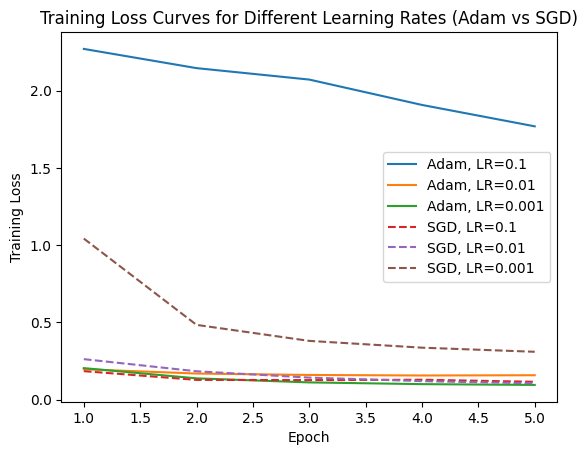

In [52]:
print(sgd_losses)
print(adam_losses)

# Plot the lines for each learning rate for Adam
for learning_rate, values in adam_losses.items():
    plt.plot(range(1, len(values) + 1), values, label=f'Adam, LR={learning_rate}')

# Plot the lines for each learning rate for SGD
for learning_rate, values in sgd_losses.items():
    plt.plot(range(1, len(values) + 1), values, label=f'SGD, LR={learning_rate}', linestyle='dashed')

plt.title('Training Loss Curves for Different Learning Rates (Adam vs SGD)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()